In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

path = r"../data"

X_train = np.load(os.path.join(path, "training.npy"))
y_train = np.load(os.path.join(path, "training_labels.npy"))
X_test = np.load(os.path.join(path, "test.npy"))

label_categories = {0: 'Other',
                    1: 'Music',
                    2: 'Human voice',
                    3: 'Engine sounds',
                    4: 'Alarm'}

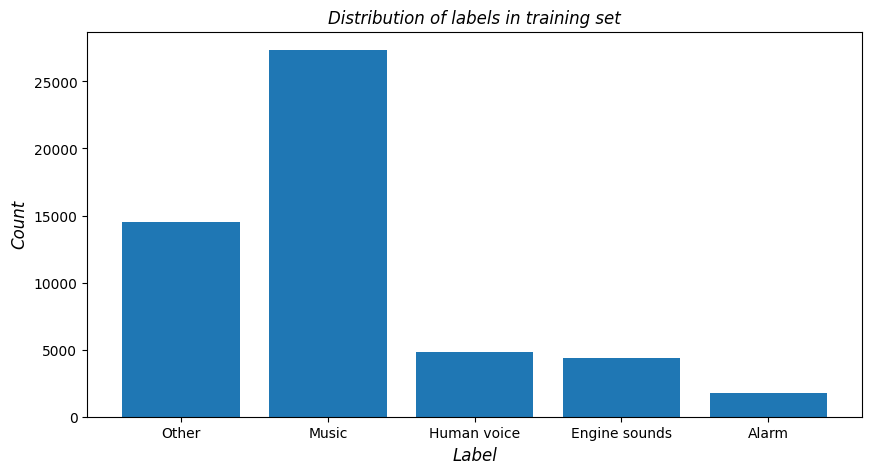

In [19]:
label, counts = np.unique(y_train, return_counts=True)

fig, axs = plt.subplots(1, figsize=(10, 5))
plt.bar(label_categories.values(), counts)
plt.title("Distribution of labels in training set", fontsize=12, fontstyle='oblique')
plt.xlabel("Label", fontsize=12, fontstyle='oblique')
plt.ylabel("Count", fontsize=12, fontstyle='oblique')
plt.savefig("figures/class_dist_training.png")
plt.show()

Number of training samples: 52890 (90.82%), Number of test samples: 5347 (9.18%)


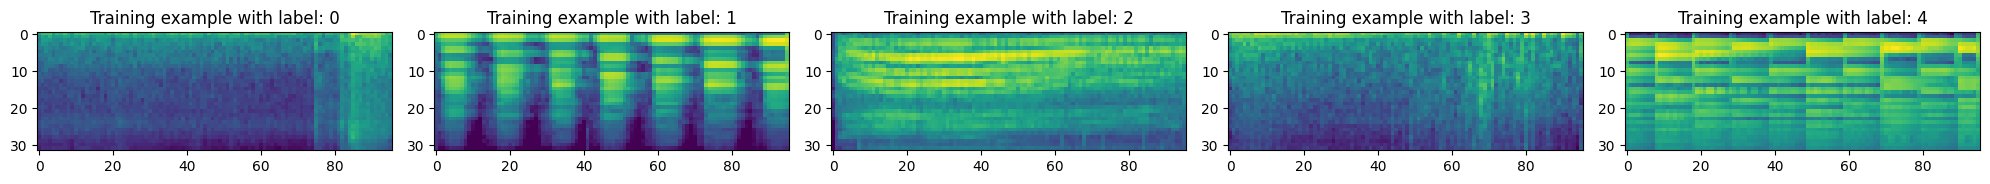

In [20]:
print(f"Number of training samples: {X_train.shape[0]} ({np.round(100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]),2)}%),",
        f"Number of test samples: {X_test.shape[0]} ({np.round(100*X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]),2)}%)")

fig, axs = plt.subplots(1, 5, figsize=(20, 3))
for i, e in enumerate([1, 2, 3, 21, 30]):
        axs[i].imshow(X_train[e])
        axs[i].set_title(f"Training example with label: {y_train[e]}")
plt.tight_layout()
plt.savefig("figures/examples.png")
plt.show()

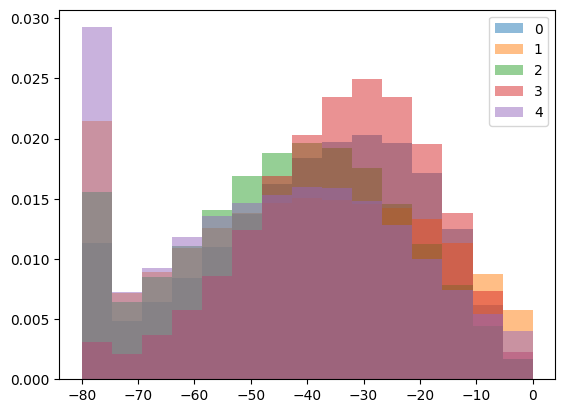

In [29]:
#print(X_train[0].min(), X_train[0].max())
#plt.hist(X_train[2].flatten())
for i in range(5):
    label_mask = y_train == i
    category = X_train[label_mask].flatten()
    plt.hist(category, alpha=0.5, label=i, density=True, bins=15)

plt.legend()
plt.show()

### Proposed transformation

#### From assignment: 
*"The provided audio is transformed into the frequency domain using a Short-time Fourier transform (STFT). Hereby we obtain a complete spectrogram with different frequency intensities at different times. The human perception of sound is not linear across frequency. We have much higher frequency resolution at low frequencies compared to higher frequencies. A commonly used way to present audio features across frequency is to use the mel-frequency scale. We therefore convert our spectrogram to the mel-scale by combining
frequency components according to the triangular weights. The mel-scale has much higher frequency resolution at low frequencies compared to high frequencies, hereby resembling the human perception of sounds across frequency. Lastly, the power spectrogram is converted to decibels."*

#### From research:
The log-scaled mel-spectrogram generation process includes:
1. Signal pre-processing.
2. A Fourier transformation to obtain the signal spectrogram.
3. Mapping of the spectrogram into a mel-spectrogram through triangular overlapping windows whose center frequencies are distributed on the mel scale. The function $B$ for computing the $m$'th mel-frequency from frequency $f$ in Hertz and its inverse $B^{−1}$ are given by \[[24](https://asa.scitation.org/doi/10.1121/1.1915893)\]:
$$B(f)=2595\log_{10}\left(1+\frac{f}{700}\right)$$
$$B^{−1}(m)=700\left(10^{\frac{m}{2595}−1}\right)$$

<center>***Comment**: I think our data transformation starts from here*</center>

4. Taking a log calculation (decibles) on the mel spectrogram,
$$LM(n)=\log\left(\sum_{k=0}^K H_n(k)*|F(k)|^2\right), \quad n=1…N$$
where $H_n(k)$ denotes the amplitude of the $n$'th filter at frequency bin $k$, $|F(k)|^2$ denotes the FFT power spectrum.

In [ ]:
# Paper suggests log transform:

def log_scale(f):
    pass

fig, axs = plt.subplots(1, 5, figsize=(20, 3))
for i, e in enumerate([1, 2, 3, 21, 30]):
        axs[i].imshow(np.log(X_train[e]))
        axs[i].set_title(f"Training example with label: {y_train[e]}")
plt.show()